In [ ]:
# !pip install simpletransformers
# !pip install emoji
# !pip install transformers
# !pip install emoji

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORT LIBRARY

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from transformers import (
    DistilBertTokenizerFast, DistilBertForSequenceClassification,
    BertTokenizerFast, BertForSequenceClassification,
    RobertaTokenizerFast, RobertaForSequenceClassification
)
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.optim import AdamW
from tqdm import tqdm

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


# LOADING DATA

In [ ]:
augmented_df = pd.read_csv("/content/drive/MyDrive/FINPRO_DEEPLEARNING/dataset/mental_health_dataset_augmented.csv")
augmented_df.head()
augmented_df.columns


Index(['text', 'label', 'text_length'], dtype='object')

In [ ]:
augmented_df = pd.read_csv("/content/drive/MyDrive/FINPRO_DEEPLEARNING/dataset/mental_health_dataset_augmented.csv")

#text, label
augmented_df = augmented_df[["text", "label"]]

# convrt label ke integer
augmented_df["label"] = augmented_df["label"].astype(int)

# split data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    augmented_df["text"], augmented_df["label"], test_size=0.2, random_state=42
)



# TOKENIZER

In [ ]:
def get_tokenizer_and_model(model_name):
    if model_name == "distilbert":
        tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
        model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=7)

    elif model_name == "bert":
        tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
        model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=7)

    elif model_name == "roberta":
        tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")
        model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=7)

    else:
        raise ValueError("Invalid model name!")

    return tokenizer, model

# ENCODE LABEL

In [ ]:
def encode(tokenizer, texts, labels):
    encodings = tokenizer(
        list(texts),
        truncation=True,
        padding=True,
        max_length=128
    )
    return encodings, labels.values

## DATASET CLASS

In [ ]:
#Dataset class
class MH_Dataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

## MODEL TRAINING

In [ ]:
# TRAIN
def train_model(model_name, epochs=3, batch_size=8, lr=3e-5):

    tokenizer, model = get_tokenizer_and_model(model_name)

    train_enc, train_lab = encode(tokenizer, train_texts, train_labels)
    test_enc, test_lab = encode(tokenizer, test_texts, test_labels)

    train_dataset = MH_Dataset(train_enc, train_lab)
    test_dataset = MH_Dataset(test_enc, test_lab)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using device:", device)

    model.to(device)
    model.train()

    optimizer = AdamW(model.parameters(), lr=lr)

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        epoch_loss = 0

        for batch in tqdm(train_loader):
            batch = {k: v.to(device) for k, v in batch.items()}

            optimizer.zero_grad()
            outputs = model(**batch)
            loss = outputs.loss

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print("Loss:", epoch_loss / len(train_loader))

    print("Training finished!")

    return tokenizer, model

## TRAIN USING DISTILBERT

In [ ]:
#distilbert
chosen_model = "distilbert"

tokenizer, model = train_model(
    model_name=chosen_model,
    epochs=6,
    batch_size=8,
    lr=3e-5
)

save_path = f"/content/drive/MyDrive/FINPRO_DEEPLEARNING/model/{chosen_model}_trained"

tokenizer.save_pretrained(save_path)
model.save_pretrained(save_path)

print("Model saved to:", save_path)

## TRAIN USING BERT

In [ ]:
#bert
chosen_model = "bert"

tokenizer, model = train_model(
    model_name=chosen_model,
    epochs=6,
    batch_size=8,
    lr=3e-5
)

save_path = f"/content/drive/MyDrive/FINPRO_DEEPLEARNING/model/{chosen_model}_trained"

tokenizer.save_pretrained(save_path)
model.save_pretrained(save_path)

print("Model saved to:", save_path)

## TRAIN USING ROBERTA

In [ ]:
#roberta
chosen_model = "roberta"

tokenizer, model = train_model(
    model_name=chosen_model,
    epochs=6,
    batch_size=8,
    lr=3e-5
)

save_path = f"/content/drive/MyDrive/FINPRO_DEEPLEARNING/model/{chosen_model}_trained"

tokenizer.save_pretrained(save_path)
model.save_pretrained(save_path)

print("Model saved to:", save_path)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cuda
Epoch 1/6


100%|██████████| 8636/8636 [28:03<00:00,  5.13it/s]


Loss: 0.7663653466258251
Epoch 2/6


100%|██████████| 8636/8636 [28:05<00:00,  5.12it/s]


Loss: 0.4240951759571075
Epoch 3/6


100%|██████████| 8636/8636 [28:04<00:00,  5.13it/s]


Loss: 0.33698707262682587
Epoch 4/6


100%|██████████| 8636/8636 [28:04<00:00,  5.13it/s]


Loss: 0.28232327263884033
Epoch 5/6


100%|██████████| 8636/8636 [28:06<00:00,  5.12it/s]


Loss: 0.2466169829433331
Epoch 6/6


100%|██████████| 8636/8636 [28:04<00:00,  5.13it/s]


Loss: 0.21354340405966438
Training finished!
Model saved to: /content/drive/MyDrive/FINPRO_DEEPLEARNING/model/roberta_trained


## LOAD MODEL (BUAT EVALUASI)


> untuk plotting



In [ ]:
def load_model(model_name):

    base_path = "/content/drive/MyDrive/FINPRO_DEEPLEARNING/model"

  #cantumin modelnya ada apa aja
    models = {
        "distilbert": f"{base_path}/distilbert_trained",
        "bert": f"{base_path}/bert_trained",
        "roberta": f"{base_path}/roberta_trained",
    }

    path = models[model_name]

    tokenizer = AutoTokenizer.from_pretrained(path)
    model = AutoModelForSequenceClassification.from_pretrained(path)

    model.eval()
    return tokenizer, model


## LOAD DATASET

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/FINPRO_DEEPLEARNING/dataset/mental_health_dataset_augmented.csv")

df = df[["text", "label"]]
df["label"] = df["label"].astype(int)
df

,text,label
0,oh my gosh,3
1,"trouble sleeping, confused mind, restless hear...",3
2,"All wrong, back off dear, forward doubt. Stay ...",3
3,I've shifted my focus to something else but I'...,3
4,"I'm restless and restless, it's been a month n...",3
...,...,...
86352,"So, when I was younger, I knew perfectly well ...",6
86353,This has been going on since I was a child. A ...,6
86354,This birth been run on since I was a child. A ...,6
86355,It ' s either imbibition beaver state be on Helex,6


## TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["text"].tolist(), df["label"].tolist(),
    test_size=0.2, random_state=42
)


## EVALUATION FUNC

In [ ]:
import torch
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import seaborn as sns
import matplotlib.pyplot as pltplt
import pandas as pd

#evaluasi model sebesar 3000 random sample

def evaluate_model_fast(model_name, model_path, sample_size=3000):
    print(f"Evaluating {model_name} using {sample_size} samples...\n")

    #  load dr folder
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    model.eval()

    df = pd.DataFrame({"text": test_texts, "label": test_labels})
    df = df.sample(sample_size)

    preds, trues = [], []

    for _, row in df.iterrows():
        inputs = tokenizer(row["text"], return_tensors="pt", truncation=True, padding=True)

        with torch.no_grad():
            pred = model(**inputs).logits.argmax(dim=1).item()

        preds.append(pred)
        trues.append(row["label"])

    # classification report
    print(classification_report(trues, preds))

    # confusion matrix
    cm = confusion_matrix(trues, preds)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix — {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return classification_report(trues, preds, output_dict=True)


## EVAL MODEL


⚡ Evaluating distilbert using 3000 samples...

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       706
           1       0.78      0.68      0.73       559
           2       0.64      0.83      0.72       364
           3       0.96      0.96      0.96       491
           4       0.97      0.97      0.97       357
           5       0.82      0.71      0.76       337
           6       0.96      0.93      0.94       186

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



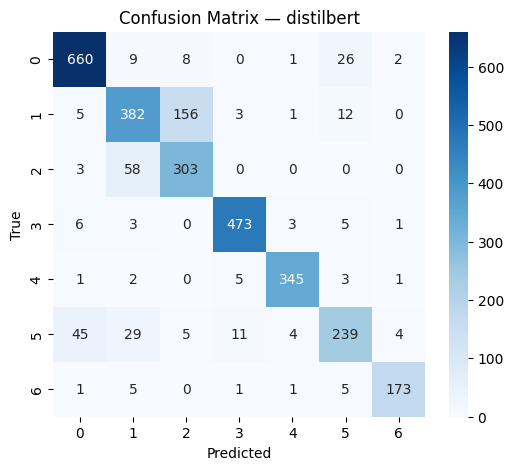


⚡ Evaluating bert using 3000 samples...

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       679
           1       0.80      0.72      0.75       572
           2       0.67      0.80      0.73       371
           3       0.95      0.98      0.96       458
           4       0.97      0.96      0.97       358
           5       0.80      0.80      0.80       379
           6       0.93      0.97      0.95       183

    accuracy                           0.86      3000
   macro avg       0.87      0.88      0.87      3000
weighted avg       0.87      0.86      0.86      3000



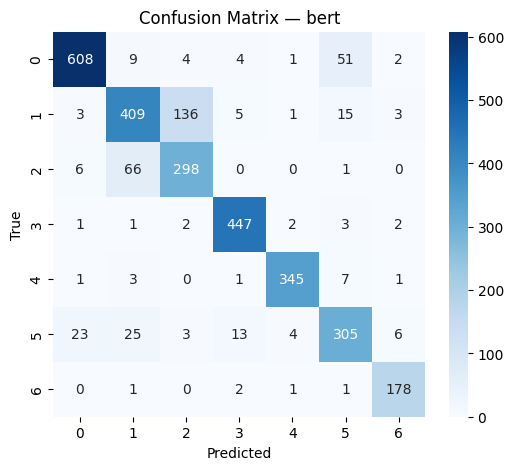


⚡ Evaluating roberta using 3000 samples...

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       717
           1       0.76      0.77      0.76       544
           2       0.75      0.77      0.76       428
           3       0.94      0.96      0.95       465
           4       0.97      0.95      0.96       300
           5       0.82      0.80      0.81       362
           6       0.97      0.96      0.97       184

    accuracy                           0.87      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.87      0.87      0.87      3000



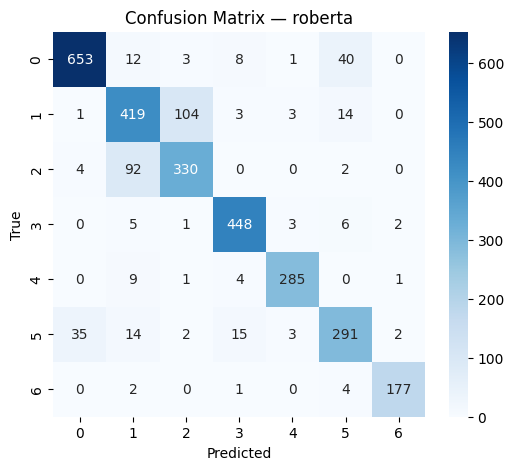

In [ ]:
base = "/content/drive/MyDrive/FINPRO_DEEPLEARNING/model"

results = {}
results["distilbert"] = evaluate_model_fast("distilbert", f"{base}/distilbert_trained")
results["bert"]       = evaluate_model_fast("bert",       f"{base}/bert_trained")
results["roberta"]    = evaluate_model_fast("roberta",    f"{base}/roberta_trained")


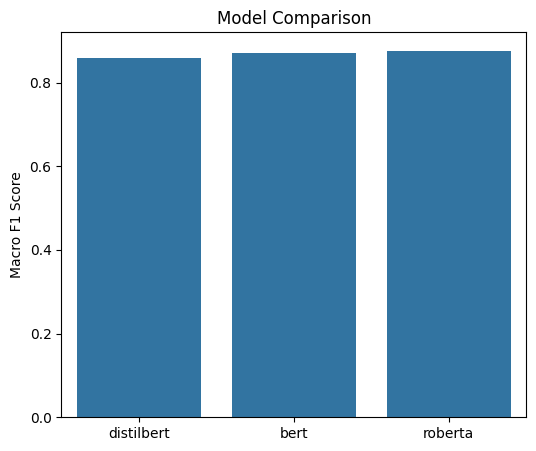

In [ ]:
models = ["distilbert", "bert", "roberta"]
f1_scores = [ results[m]["macro avg"]["f1-score"] for m in models ]

plt.figure(figsize=(6,5))
sns.barplot(x=models, y=f1_scores)
plt.ylabel("Macro F1 Score")
plt.title("Model Comparison")
plt.show()

## TRAIN & VAL LOSS

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm


def compute_loss_curve(model_path, texts, labels, sample_size=1000, batch_size=8):
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    model.eval()

    df = pd.DataFrame({"text": texts, "label": labels}).sample(sample_size)

    losses = []

    for i in tqdm(range(0, sample_size, batch_size)):
        batch = df.iloc[i:i+batch_size]

        inputs = tokenizer(
            list(batch["text"]),
            return_tensors="pt",
            truncation=True,
            padding=True
        )
        targets = torch.tensor(list(batch["label"]))

        with torch.no_grad():
            outputs = model(**inputs, labels=targets)
            loss = outputs.loss.item()

        losses.append(loss)

    return losses


In [ ]:
train_losses = compute_loss_curve(
    "/content/drive/MyDrive/FINPRO_DEEPLEARNING/model/distilbert_trained",
    train_texts,
    train_labels,
    sample_size=1000
)

val_losses = compute_loss_curve(
    "/content/drive/MyDrive/FINPRO_DEEPLEARNING/model/distilbert_trained",
    test_texts,
    test_labels,
    sample_size=300
)


100%|██████████| 38/38 [02:25<00:00,  3.82s/it]


## PLOTTING

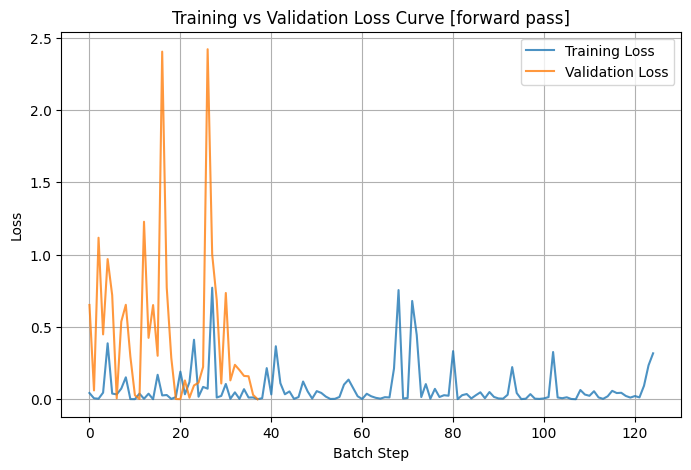

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Training Loss", alpha=0.8)
plt.plot(val_losses, label="Validation Loss", alpha=0.8)
plt.xlabel("Batch Step")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss Curve [forward pass]")
plt.legend()
plt.grid(True)
plt.show()
